# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [77]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [78]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [79]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [80]:
boston.data.shape

(506, 13)

In [81]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [82]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [83]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [84]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [85]:
print(boston.target.shape)

(506,)


In [86]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [87]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

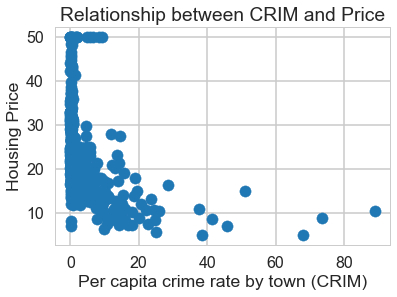

In [88]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship

Some of the key takeaways between CRIM and PRICE are the following:

* From the scatter plot, we can see the relationship is non-linear 

* Most of the data points on the plot are below 20 (CRIM). This means most of the houses in the data have low crime rate.

* The price of the house significantly increases with lower Crime rate. On the other hand, after crime rate of 20, the price of houses does not decrease significantly.

* It looks like there is a negative correlation between the Housing Price and the per capita crime rate. Just to make sure lets create a heatmap with the correlation between CRIM and PRICE.


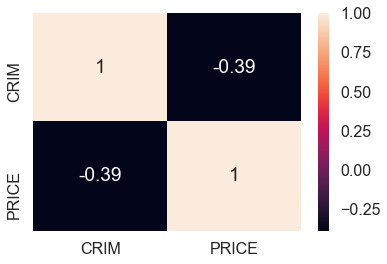

In [89]:
sns.heatmap(bos[['CRIM','PRICE']].corr(),annot=True)

* As shown on the heatmap, there is a negative correlation between CRIM and PRICE.

Text(0.5,1,'Relationship between RM and Price')

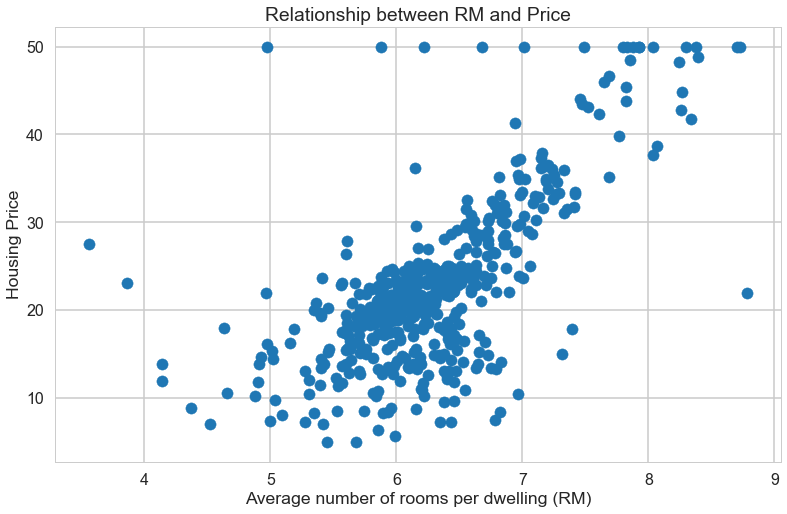

In [90]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize=(13,8))
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

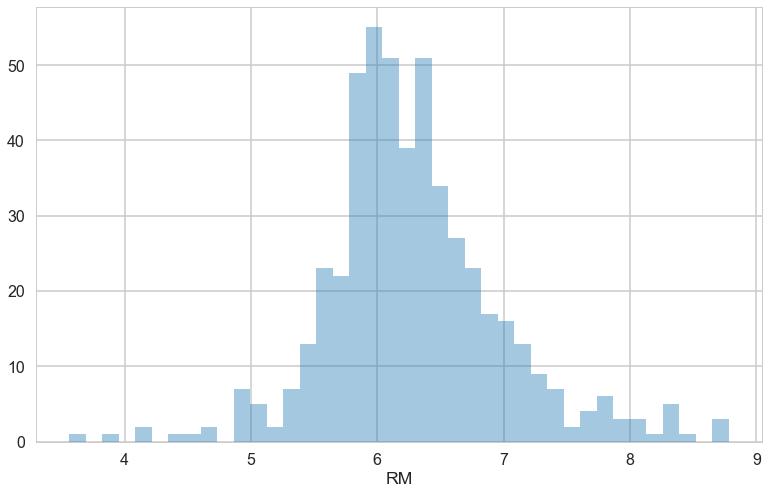

In [91]:
plt.figure(figsize=(13,8))
sns.distplot(bos['RM'],kde=False,bins=40)

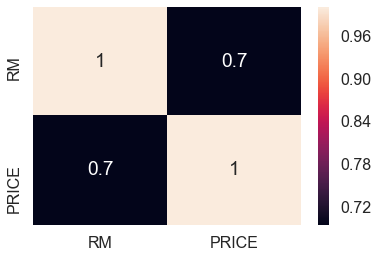

In [92]:
sns.heatmap(bos[['RM','PRICE']].corr(),annot=True)

The relationship is linear between RM and Housing Price. It has a positive correlation which will be shown with a heatmap. This means that increasing the rooms of a house will increase the price. Most of the houses seem to have 6 rooms. This means that most of the houses with low crime rate have 6 rooms. There seems to be an outlier with 9 rooms and price of 20k. The average number of rooms per dwelling is normally distributed as shown by the bar graph. 

Text(0.5,1,'Relationship between PTRATIO and Price')

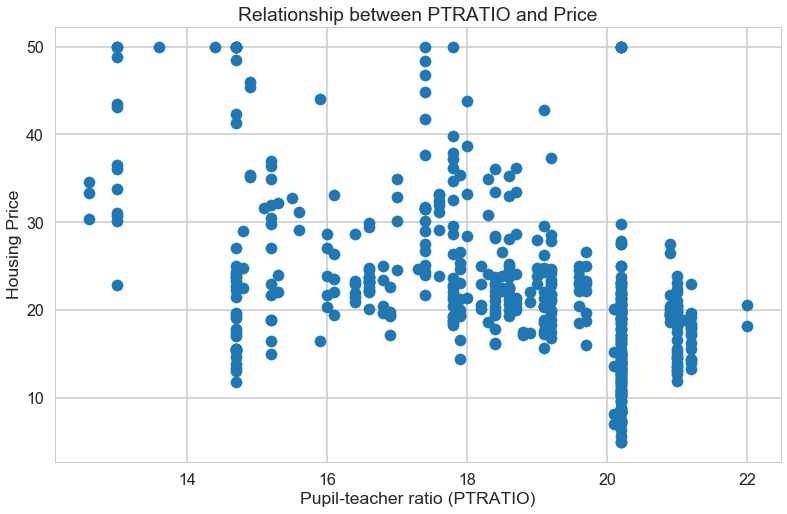

In [93]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(13,8))
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")


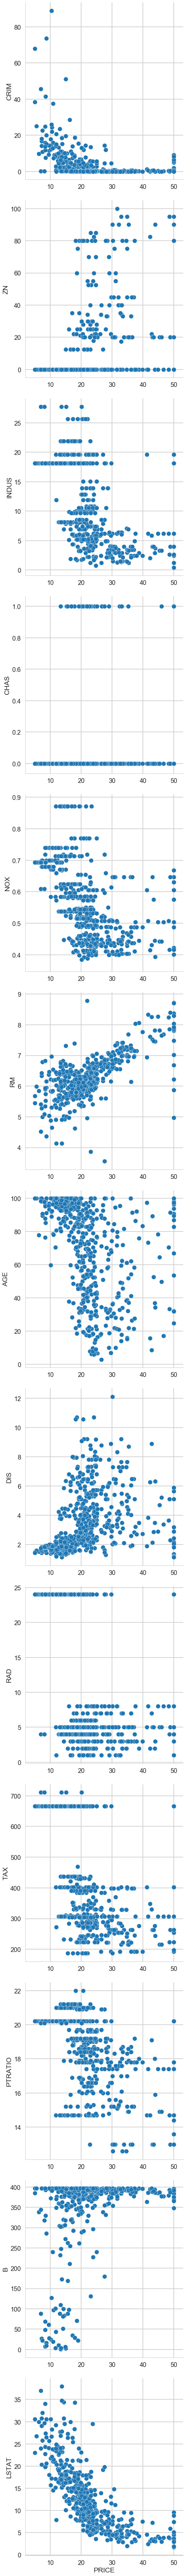

In [94]:
sns.pairplot(bos, x_vars=['PRICE'], y_vars=bos.columns.drop('PRICE'),size=7.0)

The CHAS variable is the only categorical variable in the data. 

1. The AGE plot shows that most of the houses are older than 20 years.
2. The DIS(weighted distances to five Boston employment centres) plot shows a positive correlation.
3. LSTAT has a negative correlation and a linear relationship.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

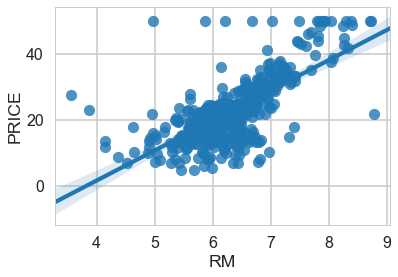

In [95]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


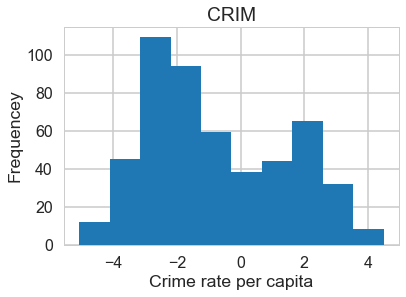

In [96]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

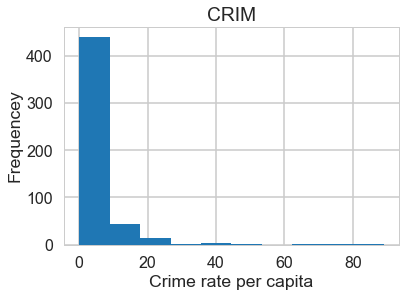

In [97]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


The purpose of the log is to normalize the scale of crime rate per capita. This causes the original data (right-skewed) to become bimodal distribution. Taking the log of CRIM gets rid of skewness.

Below you can find the histogram for *RM* and *PTRATIO* 

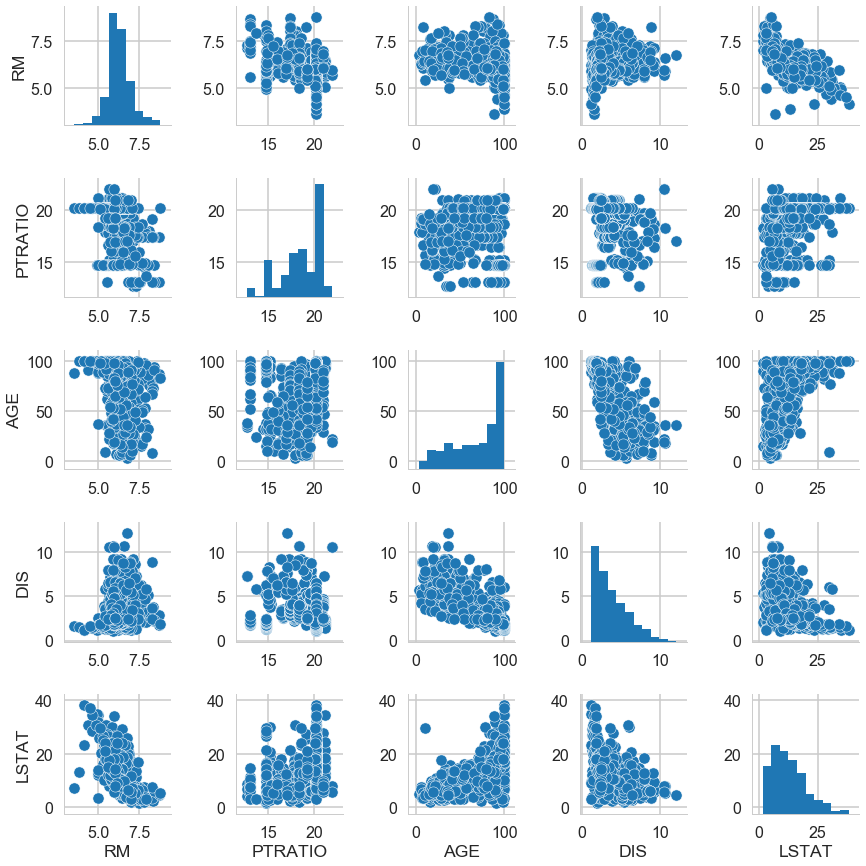

In [98]:
sns.pairplot(bos, vars=['RM','PTRATIO','AGE','DIS','LSTAT'])

LSTAT and DIS look right-tailed or positively skewed. On the other hand, AGE distribution looks left-tailed or negatively skewed. Since we can only take the log of positively skewed distributions, lets check how the distribution is affected by taking the log of LSTAT and DIS.

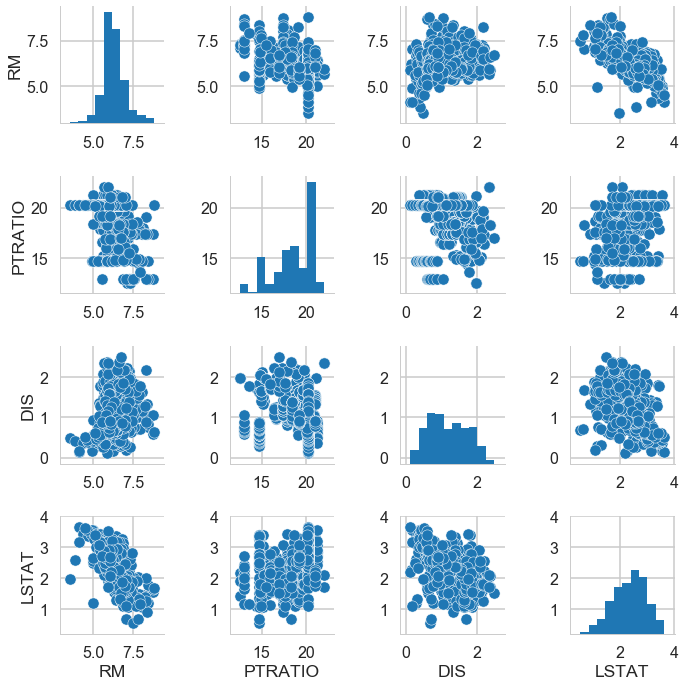

In [99]:
bos_log = np.log(bos[['DIS','LSTAT']])
bos2 = bos[['RM','PTRATIO']]

sns.pairplot(pd.concat([bos2,bos_log],axis=1))

We normalized the distribution of DIS and LSTAT

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [100]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [101]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           2.49e-74
Time:                        16:29:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [102]:
# your turn
m2 = ols('PRICE ~ RM + PTRATIO + np.log(DIS) + np.log(CRIM)', bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           4.77e-97
Time:                        16:29:45   Log-Likelihood:                -1611.2
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     501   BIC:                             3253.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.0628      4.062     -1.000   

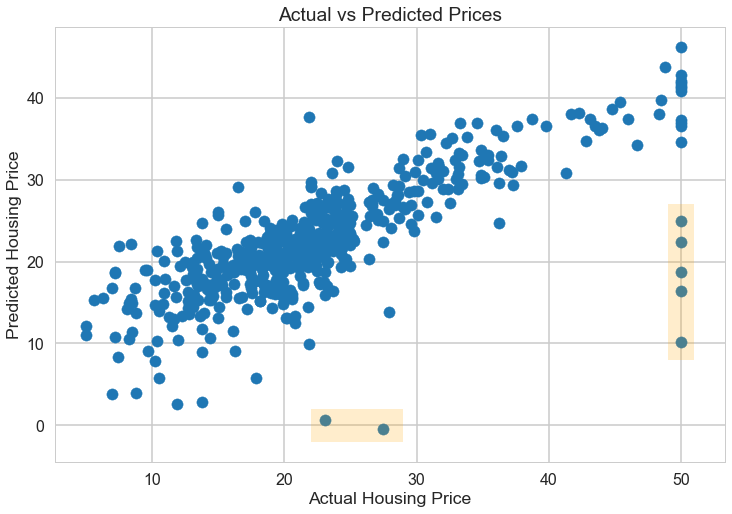

In [103]:
plt.figure(figsize=(12,8))
plt.scatter(x=bos.PRICE, y=m2.fittedvalues)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.title("Actual vs Predicted Prices")
plt.fill_between([49,51], 8, 27, facecolor='orange', alpha = .20, interpolate=True)
plt.fill_between([22,29], -2, 2, facecolor='orange', alpha = .20, interpolate=True)

For the outliers in orange, the predicted housing price was lower than the actual housing price. In the OLS Regression Results, all the predictors have a p-value lower than 0.05 making them significant. However, the intercept's p-value is high at 0.318. This means it fails to reject the null hypothesis which states that $\beta_0$ = 0. So lets try using the suggested formula to fit a model without an intercept by including - 1 in the formula.

In [104]:
m3 = ols('PRICE ~ RM + PTRATIO + np.log(DIS) + np.log(CRIM) - 1', bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2047.
Date:                Fri, 23 Feb 2018   Prob (F-statistic):          3.59e-309
Time:                        16:29:46   Log-Likelihood:                -1611.7
No. Observations:                 506   AIC:                             3231.
Df Residuals:                     502   BIC:                             3248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
RM               6.9812      0.254     27.505   

Text(0.5,1,'Actual vs Predicted Prices')

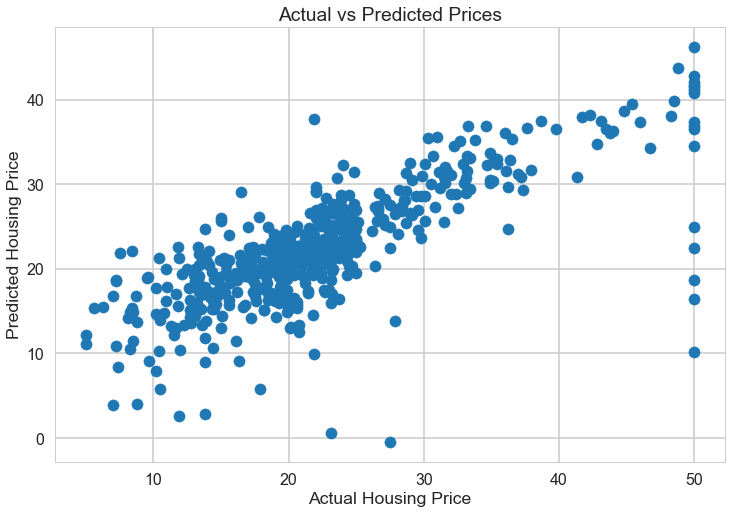

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(x=bos.PRICE, y=m2.fittedvalues)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.title("Actual vs Predicted Prices")

By dropping the intercept, the predictors still have a p-value < 0.05. As well, the R-Squared improved significantly and standard error dropped. 

### Fitting Linear Regression using `sklearn`


In [106]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [107]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [108]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


To not fit an intercept term, set the LinearRegression object as follows:

In [109]:
lm_RTO = LinearRegression(fit_intercept=False)

In [110]:
def findValues(X,y,lm):
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
#     newX = np.append(np.ones((len(X),1)), X, axis=1)
#     MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)
    
    features = list(["INTERCEPT"])
    features.extend(X.columns)

    myDF3 = pd.DataFrame()
    myDF3['Coeff. Names'],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [features,params,sd_b,ts_b,p_values]
    print(myDF3)

In [111]:
findValues(X=X,y=bos.PRICE,lm=lm)

   Coeff. Names  Coefficients  Standard Errors  t values  Probabilites
0     INTERCEPT       36.4911            5.104     7.149         0.000
1          CRIM       -0.1072            0.033    -3.276         0.001
2            ZN        0.0464            0.014     3.380         0.001
3         INDUS        0.0209            0.061     0.339         0.735
4          CHAS        2.6886            0.862     3.120         0.002
5           NOX      -17.7958            3.821    -4.658         0.000
6            RM        3.8048            0.418     9.102         0.000
7           AGE        0.0008            0.013     0.057         0.955
8           DIS       -1.4758            0.199    -7.398         0.000
9           RAD        0.3057            0.066     4.608         0.000
10          TAX       -0.0123            0.004    -3.278         0.001
11      PTRATIO       -0.9535            0.131    -7.287         0.000
12            B        0.0094            0.003     3.500         0.001
13    

As seen from the p-values for the coefficients, INDUS and AGE are not signficant so lets drop them and fit the model again.

In [112]:
X_drop = bos.drop(['PRICE','INDUS','AGE'],axis=1)
lm3 = LinearRegression()
lm3.fit(X_drop,bos['PRICE'])
findValues(X=X_drop,y=bos['PRICE'],lm=lm3)

   Coeff. Names  Coefficients  Standard Errors  t values  Probabilites
0     INTERCEPT       36.3694            5.069     7.176         0.000
1          CRIM       -0.1076            0.033    -3.296         0.001
2            ZN        0.0458            0.014     3.387         0.001
3          CHAS        2.7212            0.854     3.185         0.002
4           NOX      -17.3956            3.536    -4.920         0.000
5            RM        3.7966            0.406     9.343         0.000
6           DIS       -1.4934            0.186    -8.039         0.000
7           RAD        0.2991            0.063     4.719         0.000
8           TAX       -0.0118            0.003    -3.488         0.001
9       PTRATIO       -0.9471            0.129    -7.337         0.000
10            B        0.0094            0.003     3.508         0.000
11        LSTAT       -0.5232            0.047   -11.037         0.000


The intercept rejects the null hypothesis in both cases. When we drop the non-significant predictors, the standard error slightly drops for the intercept. Lets see what happens when we drop the intercept and do RTO(Regression through the Origin) with all the 13 predictors.

In [113]:
lm_RTO.fit(X, bos['PRICE'])
findValues(X, bos['PRICE'], lm_RTO)

   Coeff. Names  Coefficients  Standard Errors  t values  Probabilites
0     INTERCEPT        0.0000            5.363     0.000         1.000
1          CRIM       -0.0916            0.034    -2.666         0.008
2            ZN        0.0487            0.014     3.375         0.001
3         INDUS       -0.0038            0.065    -0.058         0.953
4          CHAS        2.8564            0.905     3.155         0.002
5           NOX       -2.8808            4.014    -0.718         0.473
6            RM        5.9252            0.439    13.492         0.000
7           AGE       -0.0072            0.014    -0.520         0.603
8           DIS       -0.9680            0.210    -4.619         0.000
9           RAD        0.1704            0.070     2.446         0.015
10          TAX       -0.0094            0.004    -2.376         0.018
11      PTRATIO       -0.3924            0.137    -2.855         0.004
12            B        0.0150            0.003     5.314         0.000
13    

The p-values of NOX becomes not significant when removing the intercept. It also looks like the Standard Errors of the predictors went up. I would recommend having an intercept because not only the data shows the intercept to be significant, but also not having the intercept increases the Standard Errors of the predictors using "Scikit-Learn".   

Normally distributed residuals does not mean they are i.i.d. For residuals to be independently and identically distributed check if they are normally distributed(indentical) and no correlation with another variable or between residuals(independence). Below we can see a histogram that shows that the residuals of the regression are not normally distributed.

Text(0,0.5,'Frequency')

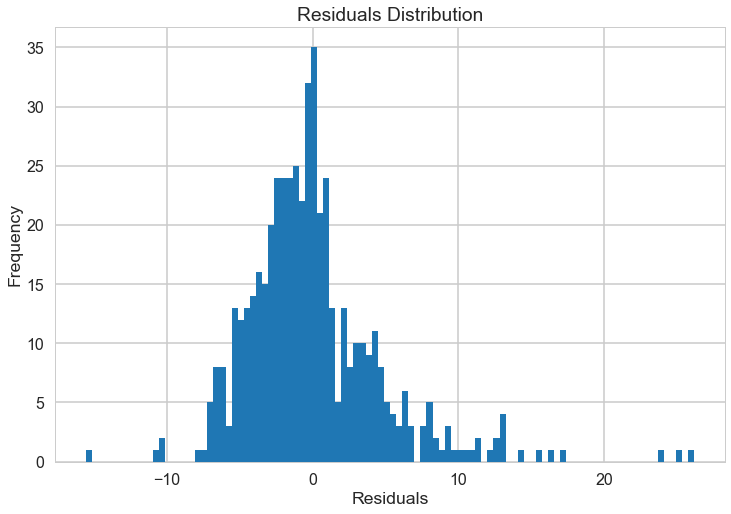

In [114]:
predicted = lm.predict(X)
residuals = bos.PRICE-predicted
plt.figure(figsize=(12,8))
plt.hist(residuals, 100)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

The scatter plot below shows residuals vs predicted. If there are patterns in the residuals, that means we can use one error to predict another. There are no real patterns on the scatter plot besides that orange straight line but the pattern is not substantial to conclude that the residuals are dependant.

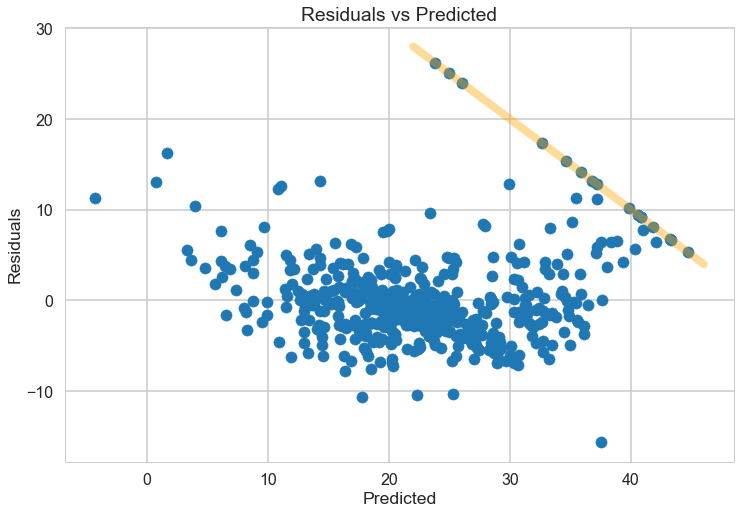

In [115]:
plt.figure(figsize=(12,8))
plt.scatter(x=predicted, y=residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.plot([46, 22], [4, 28], 'k-', lw=8,color='orange',alpha=.4)

In linear regression, y is a function of x. This means that we only assume that the response is normal conditioned on the value of x. If values of x are distributed symmetrically, then y will also be distributed symmetrically. Specifically, the residuals of a regression model should be normally distributed. So it is FALSE that Y must be normally distributed to use linear regression.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [116]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [117]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [118]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [119]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Text(0.5,1,'Predicted Values Analysis')

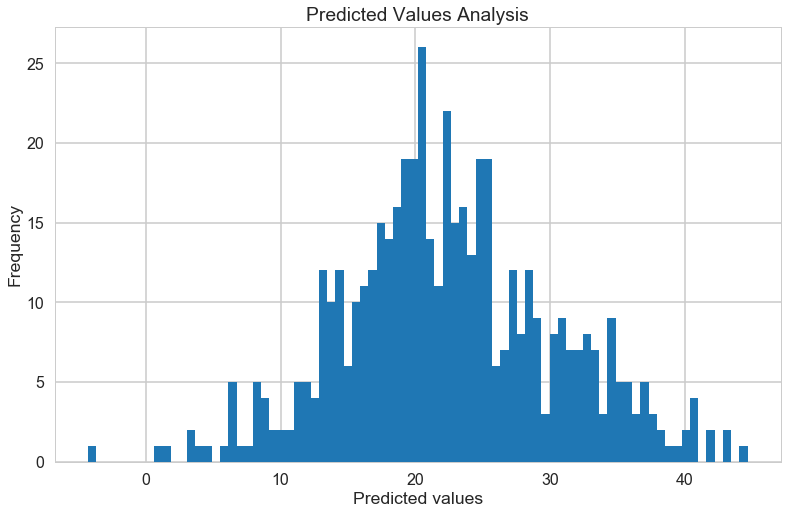

In [120]:
# your turn
pred = lm.predict(X)
plt.figure(figsize=(13,8))
plt.hist(pred,80)
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Predicted Values Analysis')

From the histogram we can see that the shape is roughly symmetric single peaked distribution. We can roughly estimate is centered at 20. The data range from about -5 to 45 so the approximate range equals 45 - (-5) = 50. There seems to be a probable outlier at -5. Now lets compute several descriptive statistics to give a more accurate description of the data.

In [121]:
from scipy.stats import describe, iqr
pd.DataFrame({'statistics': describe(pred), 'features': ['nobs','min-max','mean','variance','skewness','kurtosis']})

,features,statistics
0,nobs,506
1,min-max,"(-4.28300934192, 44.6733992277)"
2,mean,22.5328
3,variance,62.6456
4,skewness,0.110773
5,kurtosis,0.103142


From the above results, the data is actually slightly positively skewed with a value of 0.11. The center is actually at 22.53.  

An observation is considered a suspected outlier or potential outlier if it is:

below Q1 – 1.5(IQR)

    or

above Q3 + 1.5(IQR)

In [122]:
from scipy.stats.mstats import mquantiles
quant = mquantiles(pred)
IQR = iqr(pred)

possible_outliers = [value for value in pred if value >= 42.37 or value <= 2.46]
print('lower: {}'.format(quant[0] - 1.5*(IQR)))
print('upper: {}'.format(quant[2] + 1.5*(IQR)))

print('extreme lower: {}'.format(quant[0] - 3*(IQR)))
print('extreme upper: {}'.format(quant[2] + 3*(IQR)))

pd.DataFrame(sorted(possible_outliers),columns=['possible outliers'])

lower: 2.469990212907007
upper: 42.370198806185144
extreme lower: -12.477985227186139
extreme upper: 57.31817424627829


,possible outliers
0,-4.283009
1,0.780211
2,1.693474
3,43.185827
4,43.294594
5,44.673399


Any value outside of the range (2.46, 42.37) can be a suspected outlier. The table shows all the values that can be possible outliers. The outliers can be due to mistakes in the data. 

Text(0,0.5,'Predicted Housing Price')

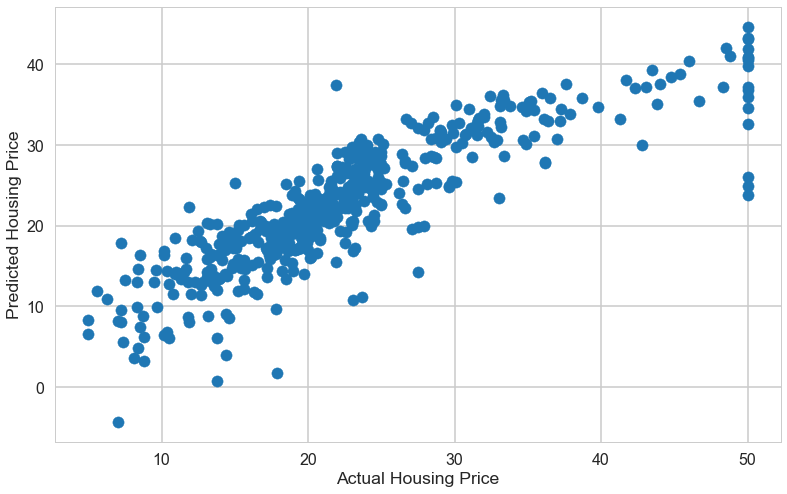

In [123]:
plt.figure(figsize=(13,8))
plt.scatter(x=bos.PRICE, y=predicted)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")

Below is a brief explanation of the advantages and disadvantages of the statsmodels and sklearn packages.

##### Statsmodels: 
One of the advatanges of statsmodels is that it has "summary()" function that shows a detailed statistical summary with p-values, standard errors, R-squared,etc. The disadvantage is that fit the model it requires a "formula" as a parameter with all the predictors you wish to evaluate in the model. If the data has many predictors, this can easily get complicated.

##### Sklearn: 
Sklearn offers an easy way to fit the model with the function "fit()" passing an numpy array. However, sklearn lacks a summary statistics for all the predictors which is valuable for analizing all of our predictors.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [124]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [125]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.69056631064e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [126]:
# your turn
md_PTRATIO = ols('PRICE ~ PTRATIO', bos).fit()
print(md_PTRATIO.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           1.61e-34
Time:                        16:29:47   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The results show that for a 1 unit increase in PTRATIO is associated with a decrease on the price of a house of 2.15. If PTRATIO is 0, that means the price of the house is 62.34. The p-value for PTRATIO is significant. 

The adjusted $R^2$ is 0.256 and tells us the percentage(25.6$%$) of the variance in the response variable $Y$(housing price) can be explained by the linear regression model with only PTRATIO as predictor.

The F-statistic is 175.1 and the p-value is 0. This means we reject the null hypothesis making the predictor PTRATIO > 0, for some $i$. 

The t-value for PTRATIO is -13.233 and F-Statistic is 175.1. In the case of simple linear regression, F-Statistic is the squared value of the t-value.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [127]:
# your turn
md_three_variables = ols('PRICE ~ CRIM+RM+PTRATIO', bos).fit()
print(md_three_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           1.09e-97
Time:                        16:29:47   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

The F-statistic is 2721 and the p-values are 0. This means we reject the null hypothesis making the predictors CRIM,RM,PTRATIO > 0, for some $i$.

The adjusted $R^2$ is 0.591 and tells us the percentage(59.1$%$) of the variance in the response variable $Y$(housing price) can be explained by the linear regression model with CRIM, RM and PTRATIO as predictors.

The summary shows that all the predictors are significant. However, the intercept's p-value(0.413) shows that is not significant and we can drop the intercept to improve our adjusted $R^2$. RM's coefficient value(7.38) shows that for a 1 unit increase in RM is associated with a increase on the price of a house of 7.38. This makes RM the predictor that affects housing price the most. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [128]:
md_four_variables = ols('PRICE ~ CRIM+RM+PTRATIO+CHAS+LSTAT', bos).fit()
print(md_four_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 23 Feb 2018   Prob (F-statistic):          1.21e-124
Time:                        16:29:47   Log-Likelihood:                -1543.9
No. Observations:                 506   AIC:                             3100.
Df Residuals:                     500   BIC:                             3125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6402      3.924      4.241      0.0

In [129]:
from statsmodels.stats.anova import anova_lm
anova_lm(md_three_variables,md_four_variables)

/Users/andrew/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/andrew/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/andrew/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,17367.841062,0.0,NaN,NaN,NaN
1,500.0,13242.886065,2.0,4124.954997,77.871149,3.624112e-30


The previous model with 3 variables has a AIC of 3233 and the one with 5 variables has a AIC of 3100. This makes the 5 variables a better fitting model. The F-Test tells us that we can reject the null hypothesis that the model with 5 variables(full model) does not provide a significantly better fit than the model with 3 variables(reduced model).


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [130]:
# Your turn.
m2 = ols('PRICE ~ RM + PTRATIO + np.log(DIS) + np.log(CRIM) - 1', bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2047.
Date:                Fri, 23 Feb 2018   Prob (F-statistic):          3.59e-309
Time:                        16:29:48   Log-Likelihood:                -1611.7
No. Observations:                 506   AIC:                             3231.
Df Residuals:                     502   BIC:                             3248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
RM               6.9812      0.254     27.505   

Text(0.5,1,'Fitted Values vs Residuals')

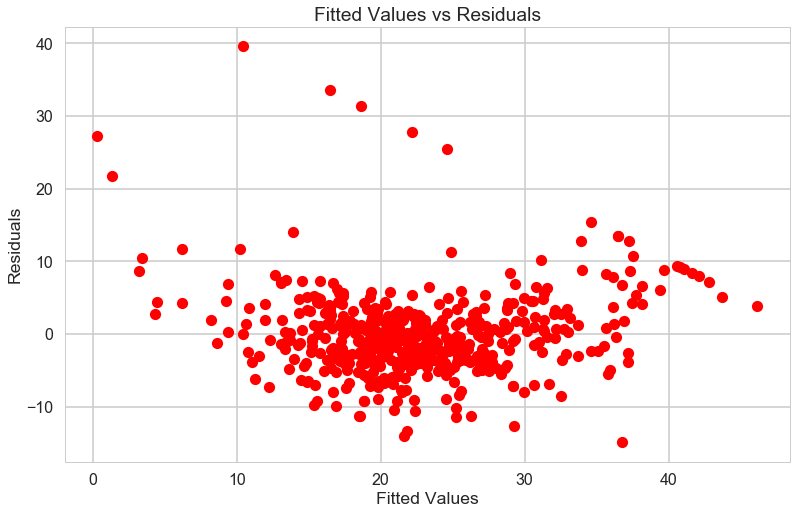

In [131]:
plt.figure(figsize=(13,8))
plt.plot(m2.fittedvalues, bos.PRICE-m2.fittedvalues, 'ro')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')

The plot is used to detect non-linearity, unequal error variances, and outliers. The residuals do NOT form a "horizontal band" around the 0 line. They look clustered kind of forming a U-Shape. This suggests that the variances of the error terms are NOT equal violating the Normal distribution for errors assumption.

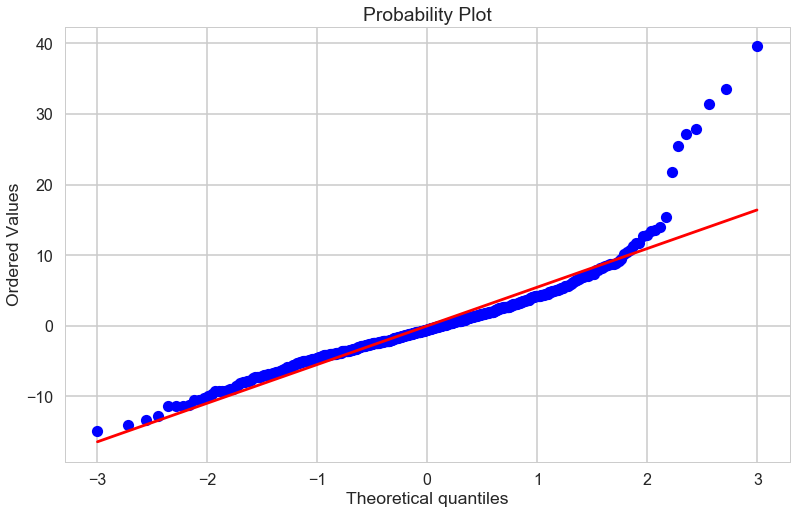

In [132]:
from scipy.stats import probplot
plt.figure(figsize=(13,8))
qp = probplot(bos.PRICE - m2.fittedvalues, plot=plt)

Text(0.5,0,'Residuals')

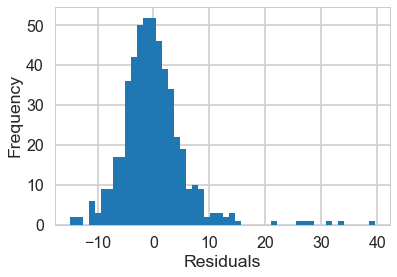

In [133]:
plt.hist(bos.PRICE - m2.fittedvalues,50)
plt.ylabel('Frequency')
plt.xlabel('Residuals')

This quantile plot and the histogram of the residuals shows the residuals are skewed. Clearly, the condition that the error terms are normally distributed is not met.

The quantile plot checks the normality of residuals, while the residual plot is used to detect non-linearity, unequal error variances, and outliers.

<Container object of 3 artists>

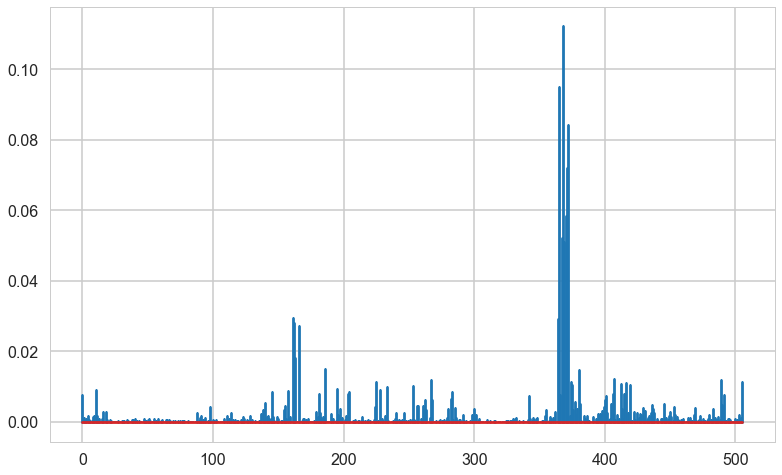

In [134]:
plt.figure(figsize=(13,8))
influence = m2.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

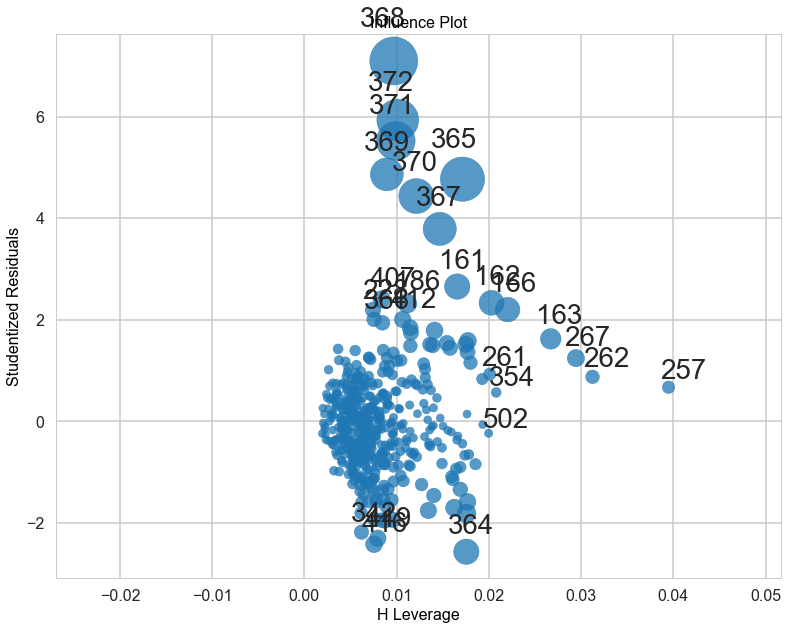

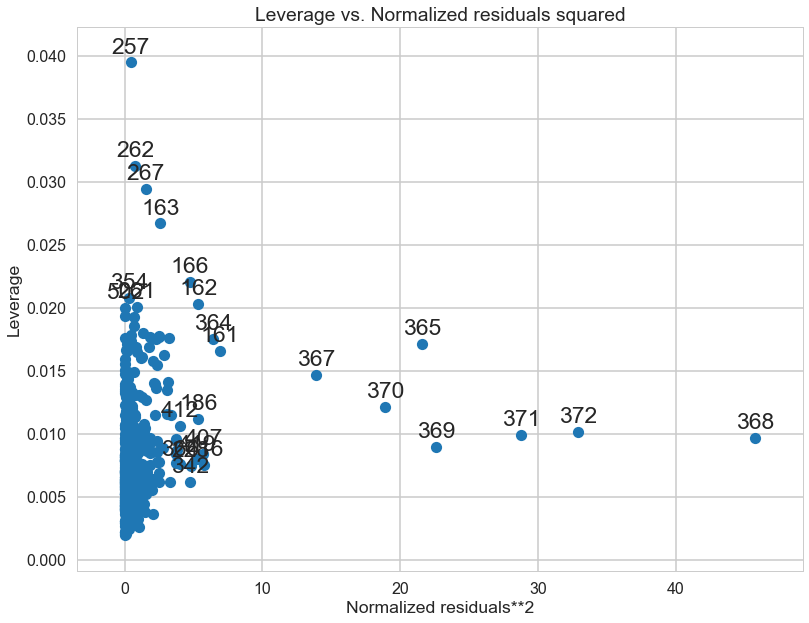

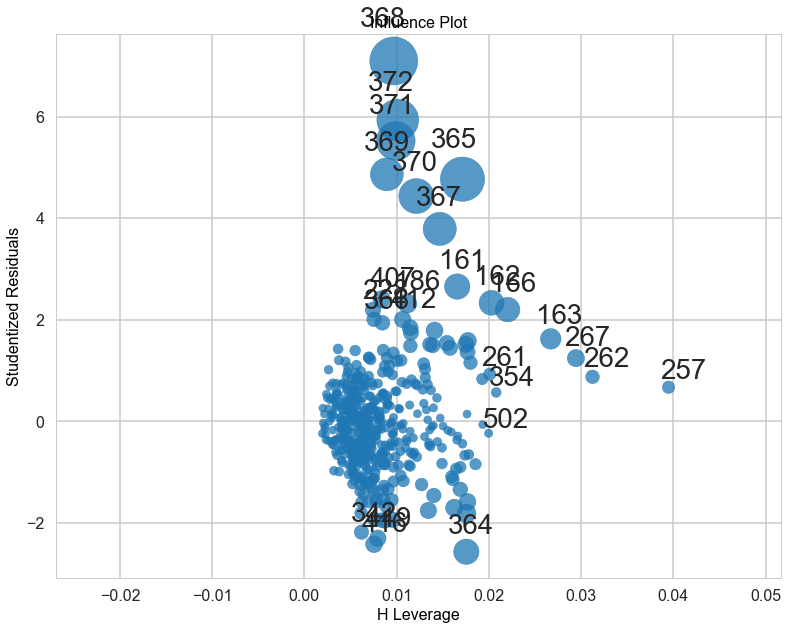

In [135]:
from statsmodels.graphics.regressionplots import *
# plt.figure(figsize=(13,8))
fig, ax = plt.subplots(figsize=(13,10))
fig, ax2 = plt.subplots(figsize=(13,10))
plot_leverage_resid2(m2,ax=ax)
influence_plot(m2,ax=ax2)

The Influence plot shows the residual on the vertical axis, leverage on the horizontal axis, and the point size is the square root of Cook's D statistic, a measure of the influence of the point. Influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded. Points with a large residual and high leverage have the most influence. You can identify outliers as those cases with a large residual (usually greater than approximately +/- 2).

Possible outliers from the Influence Plot: 365, 367, 368, 369, 370, 371, 372. Out of the possible outliers excluding 368 and 365 would cause the biggest change in the parameter estimates. 

The leverage plot shows that the points have high leverage are: 163, 257, 262, 267.

Lets remove the outliers and high leverage points from the model and run the regression again.

In [136]:
df = bos[["RM", "PTRATIO", "DIS", "CRIM", "PRICE"]]
index_remove = [163, 257, 262, 267, 365, 367, 368, 369, 370, 371, 372]
df2 = df.drop(df.index[index_remove])
df2.count()

RM         495
PTRATIO    495
DIS        495
CRIM       495
PRICE      495
dtype: int64

In [137]:
m_removed_index = ols('PRICE ~ RM + PTRATIO + np.log(DIS) + np.log(CRIM) - 1', df2).fit()
print(m_removed_index.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     3125.
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:29:51   Log-Likelihood:                -1456.7
No. Observations:                 495   AIC:                             2921.
Df Residuals:                     491   BIC:                             2938.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
RM               6.9128      0.216     32.058   

Text(0.5,1,'Fitted Values vs Residuals')

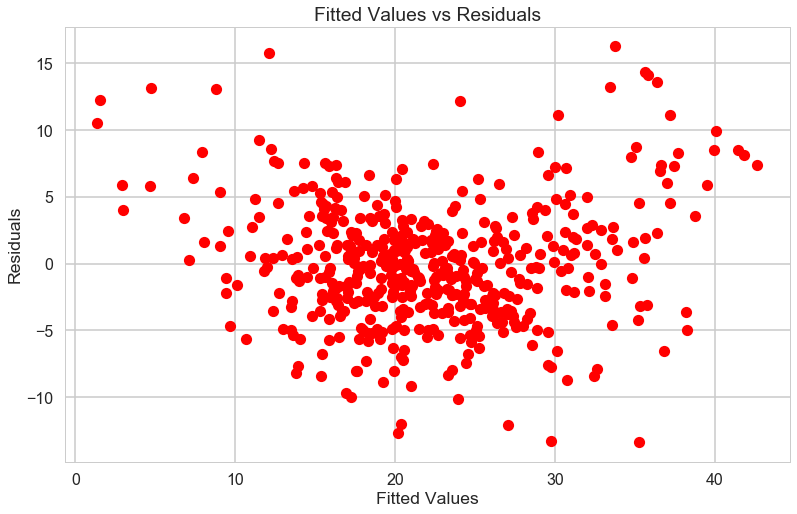

In [138]:
plt.figure(figsize=(13,8))
plt.plot(m_removed_index.fittedvalues, df2.PRICE-m_removed_index.fittedvalues, 'ro')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs Residuals')

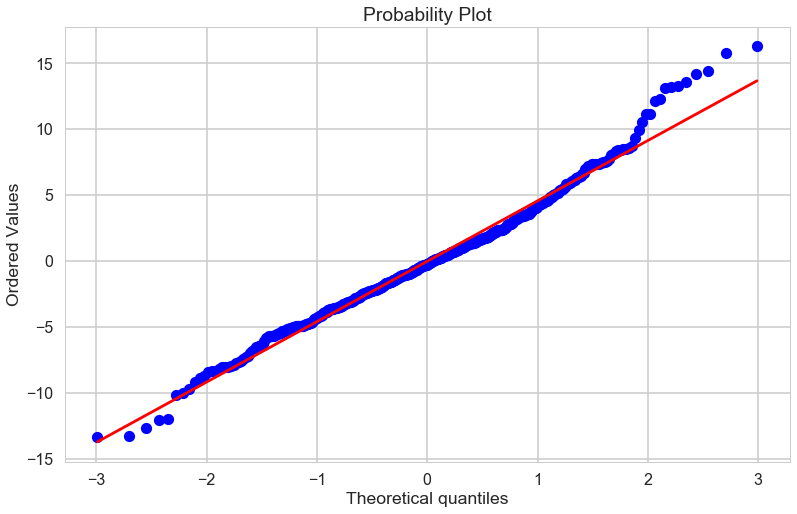

In [139]:
plt.figure(figsize=(13,8))
qp2 = probplot(df2.PRICE - m_removed_index.fittedvalues, plot=plt)

<Container object of 3 artists>

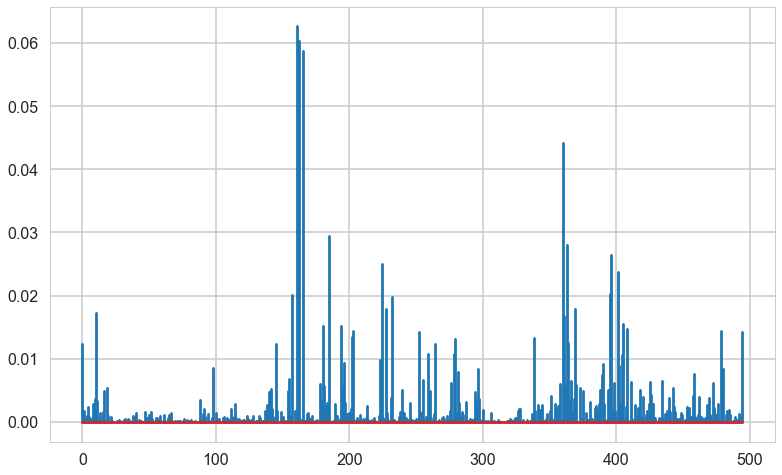

In [140]:
plt.figure(figsize=(13,8))
influence = m_removed_index.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

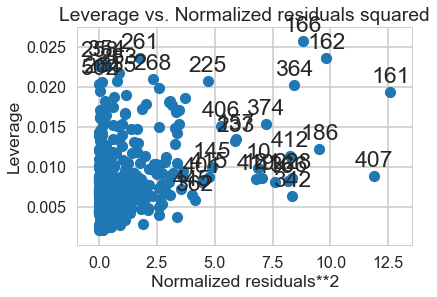

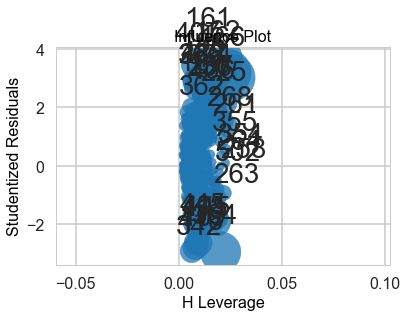

In [141]:
l2 = plot_leverage_resid2(m_removed_index)
i2 = influence_plot(m_removed_index)

The model with the removed indeces(possible outliers) has a better $R^2$ with 0.962 and the AIC is lower with a value of 2921.